<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

<h1 style="text-align: center; color: #173587"> <u> <space>Employee Attrition Prediction </u></h1>

<img src = 'https://github.com/SharvariNagesh/Capstone-ML/blob/master/images/High-employee-turnover-1280x720.jpg?raw=true' width="840" height="960">


## Table of Content
1. [Problem Statement](#section1)<br>
2. [Importing required libraries](#section2)<br>
3. [Loading data](#section3)<br> 
  - 3.1 [Loading train data from the INSAID DB server](#section301)<br>
  - 3.2 [Loading Unseen test data](#section302)<br>
4. [Dataset Description](#section4)<br>
  - 4.1 [Describing department_data](#section401)<br>
  - 4.2 [Describing employee_data](#section402)<br>
  - 4.3 [Describing employee_details_data](#section403)<br>
  - 4.4 [Data Description](#section404)<br>
5. [Examining the Data](#section4)<br>
  - 5.1 [Examining unseen test_data](#section501)<br>
  - 5.2 [Describing challenges present in the data](#section502)<br>
6. [Resolving the challenges in the data](#section6)<br>
7. [EDA and Inferences](#section7)<br>
    - 7.1 [EDA of variables and their relation with the target variables](#section701)<br>
    	- 7.1.1 [Univariate Analysis](#section70101)<br>
    	- 7.1.2 [Bivariate Analysis - CountPlots](#section70102)<br>
8. [Modelling](#section8)<br>
	- 8.1 [Feature Engineering](#section801)<br>
	- 8.2 [Finding Baseline Model](#section802)<br>
	- 8.3 [Hyper parameter tuning](#section803)<br>
9. [Submission for unseen data](#section9)<br>
	- 9.1 [Creating the Submission file](#section901)<br>
10. [Conclusions](#section10)<br>


<a id=section1></a>
# 1. Problem statement
<p>
In this project, we are trying to understand the pattern of **employee attrition ** in the company, what are the possible reasons for an employees to leave the company. We are building a Classification Model to support our HR team which will predict whether the employee will leave or stay with the company, this will help HR to take preventive action to reduce attrition.

<a id=section2></a>
# 2. Importing required libraries

Data is present in a database hosted on **"cpanel.insaid.co"** serving. Importing data from the mysql database.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id=section3></a>
# 3. Loading data

<a id=section301></a>
## 3.1 Loading train data from the INSAID DB server

Setting database credentials of the database:

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database="Capstone2"
)

Setting table names and fetching data:

In [ ]:
tables = ['department_data', 'employee_details_data', 'employee_data']

In [ ]:
sql_tables = {}
data = []
for table_name in tables:
  mycursor = mydb.cursor(buffered=True , dictionary=True)

  mycursor.execute("SELECT * FROM "+table_name)

  myresult = mycursor.fetchall()
  sql_tables[table_name] = pd.DataFrame(myresult)
  data.append(myresult)


 **Note:** There are 3 tables from where data needs to be pulled. <br>
  - **department_data** 
  - **employee_details_data**
  - **employee_data** 

<a id=section302></a>
## 3.2 Loading Unseen test data 

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/SharvariNagesh/Capstone-ML/master/content/GCD_Capstone_Project_unseen_data%20-%20GCD_Capstone_Project_unseen_data.csv')

<a id=section4></a>
# 4. Dataset Description

<a id=section401></a>
## 4.1 Describing department_data

In [ ]:
sql_tables['department_data'].head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [ ]:
sql_tables['department_data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [ ]:
sql_tables['department_data'].describe()

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-FN,IT,Edward J Bayley
freq,1,1,1


<a id=section402></a>
## 4.2 Describing employee_data

In [ ]:
sql_tables['employee_data'].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.866838,6,NaN,medium,0.134415,Left,4.00,124467
1,134.00,None,None,0.555718,2,NaN,low,0.511041,Left,3.00,112210
2,156.00,D00-SS,1.00,0.474082,2,NaN,medium,0.405101,Left,3.00,126150
3,256.00,D00-SP,None,0.961360,6,NaN,low,0.152974,Left,4.00,125346
4,146.00,D00-SS,None,0.507349,2,NaN,medium,0.434845,Left,3.00,113707


In [ ]:
sql_tables['employee_data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  object 
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  object 
 10  employee_id        14150 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


**Note** : employee_data table has missing data in the below columns:<br>
a. tenure (150 records) <br>
b. satisfaction(150 records) <br>
c. last_evaluation(1487 records) <br>
d. department(707 records) <br>
e. filed_commplaint(12104) <br>
f. recently_promoted(13853)<br>

Missing data has to be handled.

In [ ]:
sql_tables['employee_details_data'].head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
sql_tables['employee_details_data'].describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


<a id=section403></a>
## 4.3 Describing employee_details_data

In [ ]:
sql_tables['employee_details_data'].head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
sql_tables['employee_details_data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [ ]:
sql_tables['employee_details_data'].describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


<a id=section404></a>
## 4.4 Data Description
1. satisfaction_level -> how much a employee is satisfied
2. last_evaluation -> last year evaluation of employee
3. number_project -> projects he worked on
4. average_monthly_hours -> spend by employee
5. tenure-> years spend in company
6. filed_complaint-> any filed_complaint for any employee
7. promotion last 3 years-> did happen?
8. department -> which department employee working in
9. salary -> divided into three parts low, medium, high
10. marital_status -> whether the employee married or not
11. gender -> gender of the employee
12. employee_id -> id of an employee
13. age-> age of the employee
14. dept_name-> name of department
15. dept head
16. left -> Whether employee left or not (Target variable)

<a id=section5></a>
# 5. Examining the Data

In [ ]:
sql_tables['employee_data'].employee_id.nunique()

14117

**Observations**: When there are 14150 records in employee_data, only 14117 records are have unique id. There are duplicate records in the table, which needs examining.

In [ ]:
sql_tables['employee_data'].employee_id.duplicated().sum()

33

There are 33 duplicate records in the employee_data

In [ ]:
sql_tables['employee_data'][sql_tables['employee_data'].employee_id.duplicated(keep=False)]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.00,D00-SS,None,0.852702,6,NaN,low,0.069168,Left,4.00,0
304,264.00,D00-ENG,None,0.774554,6,NaN,low,0.110974,Left,4.00,0
374,307.00,D00-IT,None,0.905708,7,NaN,low,0.125275,Left,4.00,111323
1234,129.00,D00-SP,None,0.402660,2,NaN,medium,0.437359,Left,3.00,0
1438,282.00,D00-SS,None,0.875427,6,NaN,low,0.065908,Left,4.00,116247
...,...,...,...,...,...,...,...,...,...,...,...
14145,245.00,D00-SS,None,0.850785,6,NaN,medium,0.225084,Employed,5.00,101809
14146,192.00,D00-SS,None,0.951901,3,NaN,medium,0.539834,Employed,3.00,116153
14147,175.00,D00-MN,None,0.854538,4,NaN,medium,0.934465,Employed,3.00,119780
14148,268.00,D00-MT,None,0.900887,5,NaN,medium,0.906613,Left,5.00,115325


**Note** : There are 33 repeated employee ids. Also, we noted that there are 4 employee_ids with value 0. Duplicate records needs to be dropped and employee_ids with value 0 has to be deleted.

In [ ]:
sql_tables['employee_data'].nunique()

avg_monthly_hrs        249
department              12
filed_complaint          1
last_evaluation      12188
n_projects               7
recently_promoted        1
salary                   3
satisfaction         13497
status                   2
tenure                   8
employee_id          14117
dtype: int64

In [ ]:
sql_tables['employee_data'].department.unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

**Observations**: There are 12 unique departments in employee_data where as in department_data there are only 11 departments. emplyee_data has an additional department: '-IT'. Looks like this is an error while entering the data. The department should have been 'D00-IT' instead of '-IT'.

In [ ]:
sql_tables['employee_data'][sql_tables['employee_data']['employee_id'] == 0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.00,D00-SS,None,0.852702,6,NaN,low,0.069168,Left,4.00,0
304,264.00,D00-ENG,None,0.774554,6,NaN,low,0.110974,Left,4.00,0
1234,129.00,D00-SP,None,0.402660,2,NaN,medium,0.437359,Left,3.00,0
11304,167.00,None,None,0.880053,5,NaN,low,0.682140,Employed,3.00,0
12304,259.00,D00-ENG,None,0.505883,5,NaN,low,0.631046,Employed,4.00,0


In [ ]:
sql_tables['employee_details_data'][sql_tables['employee_details_data']['employee_id'] == 0]

,employee_id,age,gender,marital_status


**Observations**: There are 5 records with employee_id=0 in employee_data table and all of them have different values in other columns. Where as there is no record in employee_details_data table with employee id, 0. These 5 records needs to be handled while cleaning the data. 

In [ ]:
sql_tables['employee_details_data'].employee_id.nunique()

14245

**Observations** : There are no duplicate records in employee_details_data.

<a id=section501></a>
## 5.1 Examining unseen test_data

In [ ]:
test_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


<a id=section502></a>
# 5.2. Describing challenges present in the data



 1. Data is present in 3 different tables namely employee_data, employee_details_data and deparment_data
 2. There are total 63 duplicate records in employee_data table. 
 3. There are 5 records with employee_id 0	in employee_data table but no record with employee_id=0 in employee_details_data table.
 4. There are Null values in recently_promoted & filed_complaint columns.
 5. employee_details_data has 14245 records where as employee_data has only 14117 unique ids.  
 6. employee_data table is missing some employees data. employee_data table has missing data in the below columns:
	a. tenure (150 records)
	b. satisfaction(150 records)
	c. last_evaluation(1487 records)
	d. department(707 records)"		
 7. employee_data has 12 unique departments where as department_data table has only 11 departments. deparment value '-IT' is not present in department_data table. The correct department value should be department 'D00-IT'
 8. in department_data table, department id is named 'dept_id', where as in employee_data table, it is named 'department'. This descripancy will have problem while merging the data
 9. Issues in test_data also needs to be resolved and merged with employee_details_data and department_data before it can be used for the prediction. 

<a id=section6></a>
# 6. Resolving the challenges in the data

##### Dropping duplicate records from employee_data table:

In [ ]:
sql_tables['employee_data'] = sql_tables['employee_data'].drop_duplicates(subset=['employee_id'])

##### Dropping records from employee_data with employee_id=0:

In [ ]:
sql_tables['employee_data'] = sql_tables['employee_data'].drop(sql_tables['employee_data'][sql_tables['employee_data']['employee_id'] == 0].index)

##### Replacing department column value '-IT' with 'D00-IT':

In [ ]:
sql_tables['employee_data'] = sql_tables['employee_data'].replace({'-IT': 'D00-IT'}) # corrected version of record name of depart ment to IT
test_data = test_data.replace({'-IT': 'D00-IT'}) 

##### Renaming column name from 'dept_id' to 'department' in department_data:

In [ ]:
sql_tables['department_data'] = sql_tables['department_data'].rename(columns={'dept_id':'department'} )

##### Merging all the three data frames :

In [ ]:
train_dataset = pd.merge(sql_tables['employee_details_data'], sql_tables['employee_data'], on='employee_id', how='right').merge(sql_tables['department_data'], on='department', how='left')
test_data = pd.merge(sql_tables['employee_details_data'], test_data, on='employee_id', how='right').merge(sql_tables['department_data'], on='department', how='left')

**Note**: There are 3 dataframes which needs to be merged. First employee_details_data is merged with employee_data using right join on 'employee_id'. Then the resulting dataframe is merged with department_data using left join on 'department' column.

In [ ]:
train_dataset.describe()

,employee_id,age,last_evaluation,n_projects,recently_promoted,satisfaction
count,14116.000000,14116.000000,12629.000000,14116.000000,297.0,13966.000000
mean,112120.657764,32.896005,0.718322,3.777770,1.0,0.621322
std,8497.639403,9.975000,0.173069,1.249693,0.0,0.250460
min,100101.000000,22.000000,0.316175,1.000000,1.0,0.040058
25%,105773.500000,24.000000,0.563680,3.000000,1.0,0.450368
50%,111293.500000,29.000000,0.724428,4.000000,1.0,0.652548
75%,116655.250000,41.000000,0.871345,5.000000,1.0,0.824914
max,148988.000000,57.000000,1.000000,7.000000,1.0,1.000000


**Note**: All columns of the merged data are normally distributed. No big skewness is found.

##### Changing data type of columns:

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  object 
 5   department         13410 non-null  object 
 6   filed_complaint    2041 non-null   object 
 7   last_evaluation    12629 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  297 non-null    float64
 10  salary             14116 non-null  object 
 11  satisfaction       13966 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             13966 non-null  object 
 14  dept_name          13410 non-null  object 
 15  dept_head          13410 non-null  object 
dtypes: float64(3), int64(3

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        100 non-null    int64  
 1   age                100 non-null    int64  
 2   gender             100 non-null    object 
 3   marital_status     100 non-null    object 
 4   avg_monthly_hrs    100 non-null    int64  
 5   department         98 non-null     object 
 6   filed_complaint    15 non-null     float64
 7   last_evaluation    83 non-null     float64
 8   n_projects         100 non-null    int64  
 9   recently_promoted  3 non-null      float64
 10  salary             100 non-null    object 
 11  satisfaction       97 non-null     float64
 12  tenure             97 non-null     float64
 13  dept_name          98 non-null     object 
 14  dept_head          98 non-null     object 
dtypes: float64(5), int64(4), object(6)
memory usage: 12.5+ KB


In [ ]:
train_dataset.isnull().sum()

employee_id              0
age                      0
gender                   0
marital_status           0
avg_monthly_hrs          0
department             706
filed_complaint      12075
last_evaluation       1487
n_projects               0
recently_promoted    13819
salary                   0
satisfaction           150
status                   0
tenure                 150
dept_name              706
dept_head              706
dtype: int64

### Insights 
- filed_complaint,  recently_promote have highest None values
- last_evaluation have 3rd largest null values
- satisfaction, tenure, dept_name and dept_head have low null values

In [ ]:
test_data.isnull().sum()

employee_id           0
age                   0
gender                0
marital_status        0
avg_monthly_hrs       0
department            2
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
dept_name             2
dept_head             2
dtype: int64

In [ ]:
train_dataset.nunique()

employee_id          14116
age                     36
gender                   2
marital_status           2
avg_monthly_hrs        249
department              11
filed_complaint          1
last_evaluation      12184
n_projects               7
recently_promoted        1
salary                   3
satisfaction         13492
status                   2
tenure                   8
dept_name               11
dept_head               11
dtype: int64

In [ ]:
train_dataset[train_dataset['dept_name'].isnull()]

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_name,dept_head
0,124467,42,Female,Married,246.00,None,None,0.866838,6,NaN,medium,0.134415,Left,4.00,NaN,NaN
1,112210,23,Female,Unmarried,134.00,None,None,0.555718,2,NaN,low,0.511041,Left,3.00,NaN,NaN
25,127792,23,Female,Unmarried,155.00,None,None,0.464598,2,NaN,medium,0.414451,Left,3.00,NaN,NaN
28,128509,25,Female,Unmarried,156.00,None,None,NaN,2,NaN,medium,0.465747,Left,3.00,NaN,NaN
39,125077,22,Female,Unmarried,233.00,None,None,0.965382,5,NaN,medium,0.962314,Left,5.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,109640,23,Male,Unmarried,187.00,None,None,0.665927,2,NaN,low,0.414367,Employed,3.00,NaN,NaN
14031,119098,24,Female,Unmarried,250.00,None,None,0.995384,3,NaN,medium,0.928952,Employed,3.00,NaN,NaN
14052,111995,25,Female,Unmarried,247.00,None,None,0.373122,3,NaN,medium,0.186189,Employed,4.00,NaN,NaN
14083,106592,39,Male,Married,230.00,None,None,NaN,4,NaN,medium,0.903135,Employed,3.00,NaN,NaN


### Pre processing before EDA

##### Treating the null values of filed_complaint and  recently_promoted as 0 since this are the data which have less amount of data:

In [ ]:
train_dataset['filed_complaint'] = train_dataset['filed_complaint'].fillna(0)
train_dataset['recently_promoted'] = train_dataset['recently_promoted'].fillna(0)
train_dataset['last_evaluation'] = train_dataset['last_evaluation'].fillna(0.0)
train_dataset['satisfaction'] = train_dataset['satisfaction'].fillna(0.0)
train_dataset['tenure'] = train_dataset['tenure'].fillna(0.0)

#test_data
test_data['filed_complaint'] = test_data['filed_complaint'].fillna(0)
test_data['recently_promoted'] = train_dataset['recently_promoted'].fillna(0)
test_data['last_evaluation'] = test_data['last_evaluation'].fillna(0.0)
test_data['satisfaction'] = test_data['satisfaction'].fillna(0.0)
test_data['tenure'] = test_data['tenure'].fillna(0.0)



In [ ]:
# mking age column int, average_mn to int recently promoted to int tenure to int
train_dataset[['age', 'avg_monthly_hrs', 'recently_promoted', 'tenure']] = train_dataset[['age', 'avg_monthly_hrs', 'recently_promoted', 'tenure']].astype(int)
test_data[['age', 'avg_monthly_hrs', 'recently_promoted', 'tenure']] = test_data[['age', 'avg_monthly_hrs', 'recently_promoted', 'tenure']].astype(int)

##### replacing null values of depart ment to other

In [ ]:
train_dataset[['department', 'dept_name', 'dept_head']] = train_dataset[['department', 'dept_name', 'dept_head']].fillna('Other')

In [ ]:
test_data['department'] = test_data['department'].fillna('Other')

In [ ]:
train_dataset['age'] = train_dataset['age'].fillna(train_dataset['age'].mean())
train_dataset['gender'] = train_dataset['gender'].fillna(train_dataset['gender'].mode()[0])
train_dataset['marital_status'] = train_dataset['marital_status'].fillna(train_dataset['marital_status'].mode()[0])

In [ ]:
test_data.isnull().sum()

employee_id          0
age                  0
gender               0
marital_status       0
avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
dept_name            2
dept_head            2
dtype: int64

In [ ]:
train_dataset.status = train_dataset.status.map({'Left':1, 'Employed':0})

<a id=section7></a>
# 7. EDA and Inferences

##### Setting Target variable:

In [ ]:
TARGET_COL = 'status'

##### Distribution of the Target variable:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


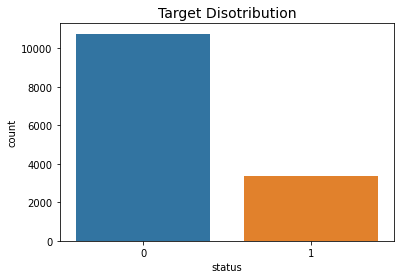

In [ ]:
_ = sns.countplot(train_dataset['status'])
_ = plt.title("Target Disotribution", fontsize=14)

###### Percentage of target variable distribution:

In [ ]:
train_dataset['status'].value_counts(normalize=True)

0    0.762326
1    0.237674
Name: status, dtype: float64

Text(0.5, 1.0, 'Pie chart showing the proportion of employees who have left the organisation')

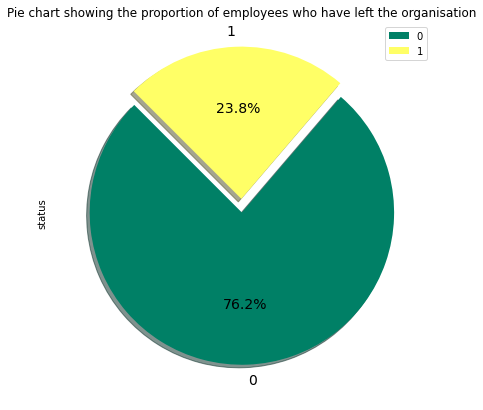

In [ ]:
train_dataset['status'].value_counts().plot(kind='pie',  explode = [0, 0.09], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(7,7), shadow=True, startangle=135, legend=True, cmap='summer')
plt.title('Pie chart showing the proportion of employees who have left the organisation')

**Observations** :  Around 76% of data is 0 i.e. employee didnt leave the company and around 24% of data is 1 i.e. employee left the company

##### Finding distribution of employee age:

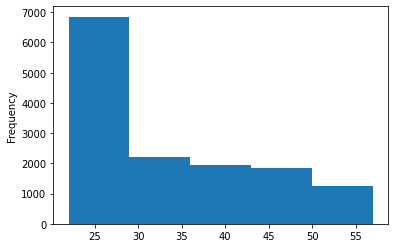

In [ ]:
train_dataset['age'].plot.hist(bins=5)

In [ ]:
train_dataset['age_group'] = pd.cut(train_dataset['age'], range(21, 62, 5),labels=['group'+str(i) for i in range(1,9)])

In [ ]:
# pd.cut(train_dataset['age'], range(22, 55, 5), right=False, labels=labels)
train_dataset['age'].min(), train_dataset['age'].max()

(22, 57)

**Observations**: Most of the employees are in the age group 20-30. Minium age of the employee is 22 and maximum is 57

##### Examining temporary employees: 

In [ ]:
train_dataset[train_dataset['department']=='D00-TP']

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_name,dept_head,age_group
43,120360,24,Female,Unmarried,125,D00-TP,0,0.0,3,0,medium,0.0,1,0,Temp,Micheal Zachrey,group1
244,116012,25,Female,Unmarried,124,D00-TP,0,0.0,3,0,low,0.0,1,0,Temp,Micheal Zachrey,group1
250,116287,22,Female,Unmarried,119,D00-TP,0,0.0,2,0,medium,0.0,1,0,Temp,Micheal Zachrey,group1
412,115235,24,Female,Unmarried,126,D00-TP,0,0.0,2,0,low,0.0,1,0,Temp,Micheal Zachrey,group1
466,122769,24,Female,Unmarried,65,D00-TP,0,0.0,1,0,high,0.0,1,0,Temp,Micheal Zachrey,group1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13736,111990,23,Male,Unmarried,122,D00-TP,0,0.0,2,0,medium,0.0,0,0,Temp,Micheal Zachrey,group1
13769,148021,23,Male,Unmarried,49,D00-TP,0,0.0,2,0,low,0.0,0,0,Temp,Micheal Zachrey,group1
13836,116171,29,Male,Unmarried,97,D00-TP,1.00,0.0,1,0,medium,0.0,0,0,Temp,Micheal Zachrey,group2
13900,106482,27,Male,Unmarried,132,D00-TP,0,0.0,2,0,medium,0.0,1,0,Temp,Micheal Zachrey,group2


Text(0.5, 1.0, 'Pie chart showing the proportion of employees who have left the organisation')

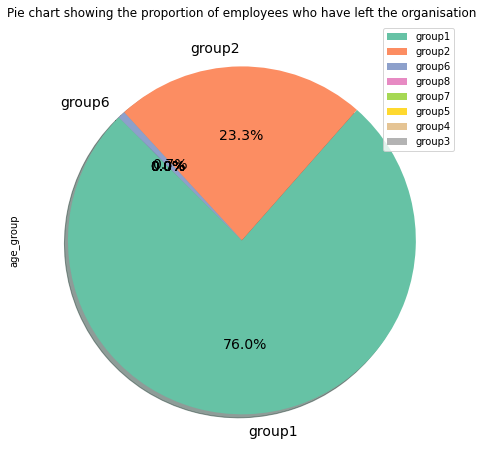

In [ ]:
train_dataset[train_dataset['department']=='D00-TP']['age_group'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(8,8), shadow=True, startangle=135, legend=True, cmap='Set2')
plt.title('Pie chart showing the proportion of employees who have left the organisation')

**Observations**: Temporary workers are all below 32 years of age. 

<a id=section701></a>
## 7.1 EDA of variables and their relation with the target variable:

There are two types of features that we have:

1. Categorical
2. Numerical

Also, our target variable is Binary.

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable

In [ ]:
cont = ['satisfaction', 'avg_monthly_hrs', 'n_projects', 'tenure', 'age', 'last_evaluation']
cats = list(set(train_dataset.columns)-set(cont))
cats.remove('employee_id')
cats.remove('department')
cats.remove('dept_head')
cats.remove('status')
# lets find categorical_variables and continuos variables
# department, salary
# age, avg_monthly_hrs, last_evaluation ,n_projects ,satisfaction ,tenure 

<a id=section70101></a>
### 7.1.1 Univariate Analysis 

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

#### Univariate Analysis - Pie Charts:

In [ ]:
train_dataset[cats]

,marital_status,dept_name,recently_promoted,gender,age_group,salary,filed_complaint
0,Married,Other,0,Female,group5,medium,0
1,Unmarried,Other,0,Female,group1,low,0
2,Unmarried,Sales,0,Female,group1,medium,1.00
3,Married,Support,0,Female,group6,low,0
4,Unmarried,Sales,0,Female,group1,medium,0
...,...,...,...,...,...,...,...
14111,Unmarried,Sales,0,Male,group2,low,0
14112,Unmarried,Sales,0,Female,group1,low,0
14113,Unmarried,Support,0,Male,group2,medium,0
14114,Married,IT,0,Male,group5,low,0


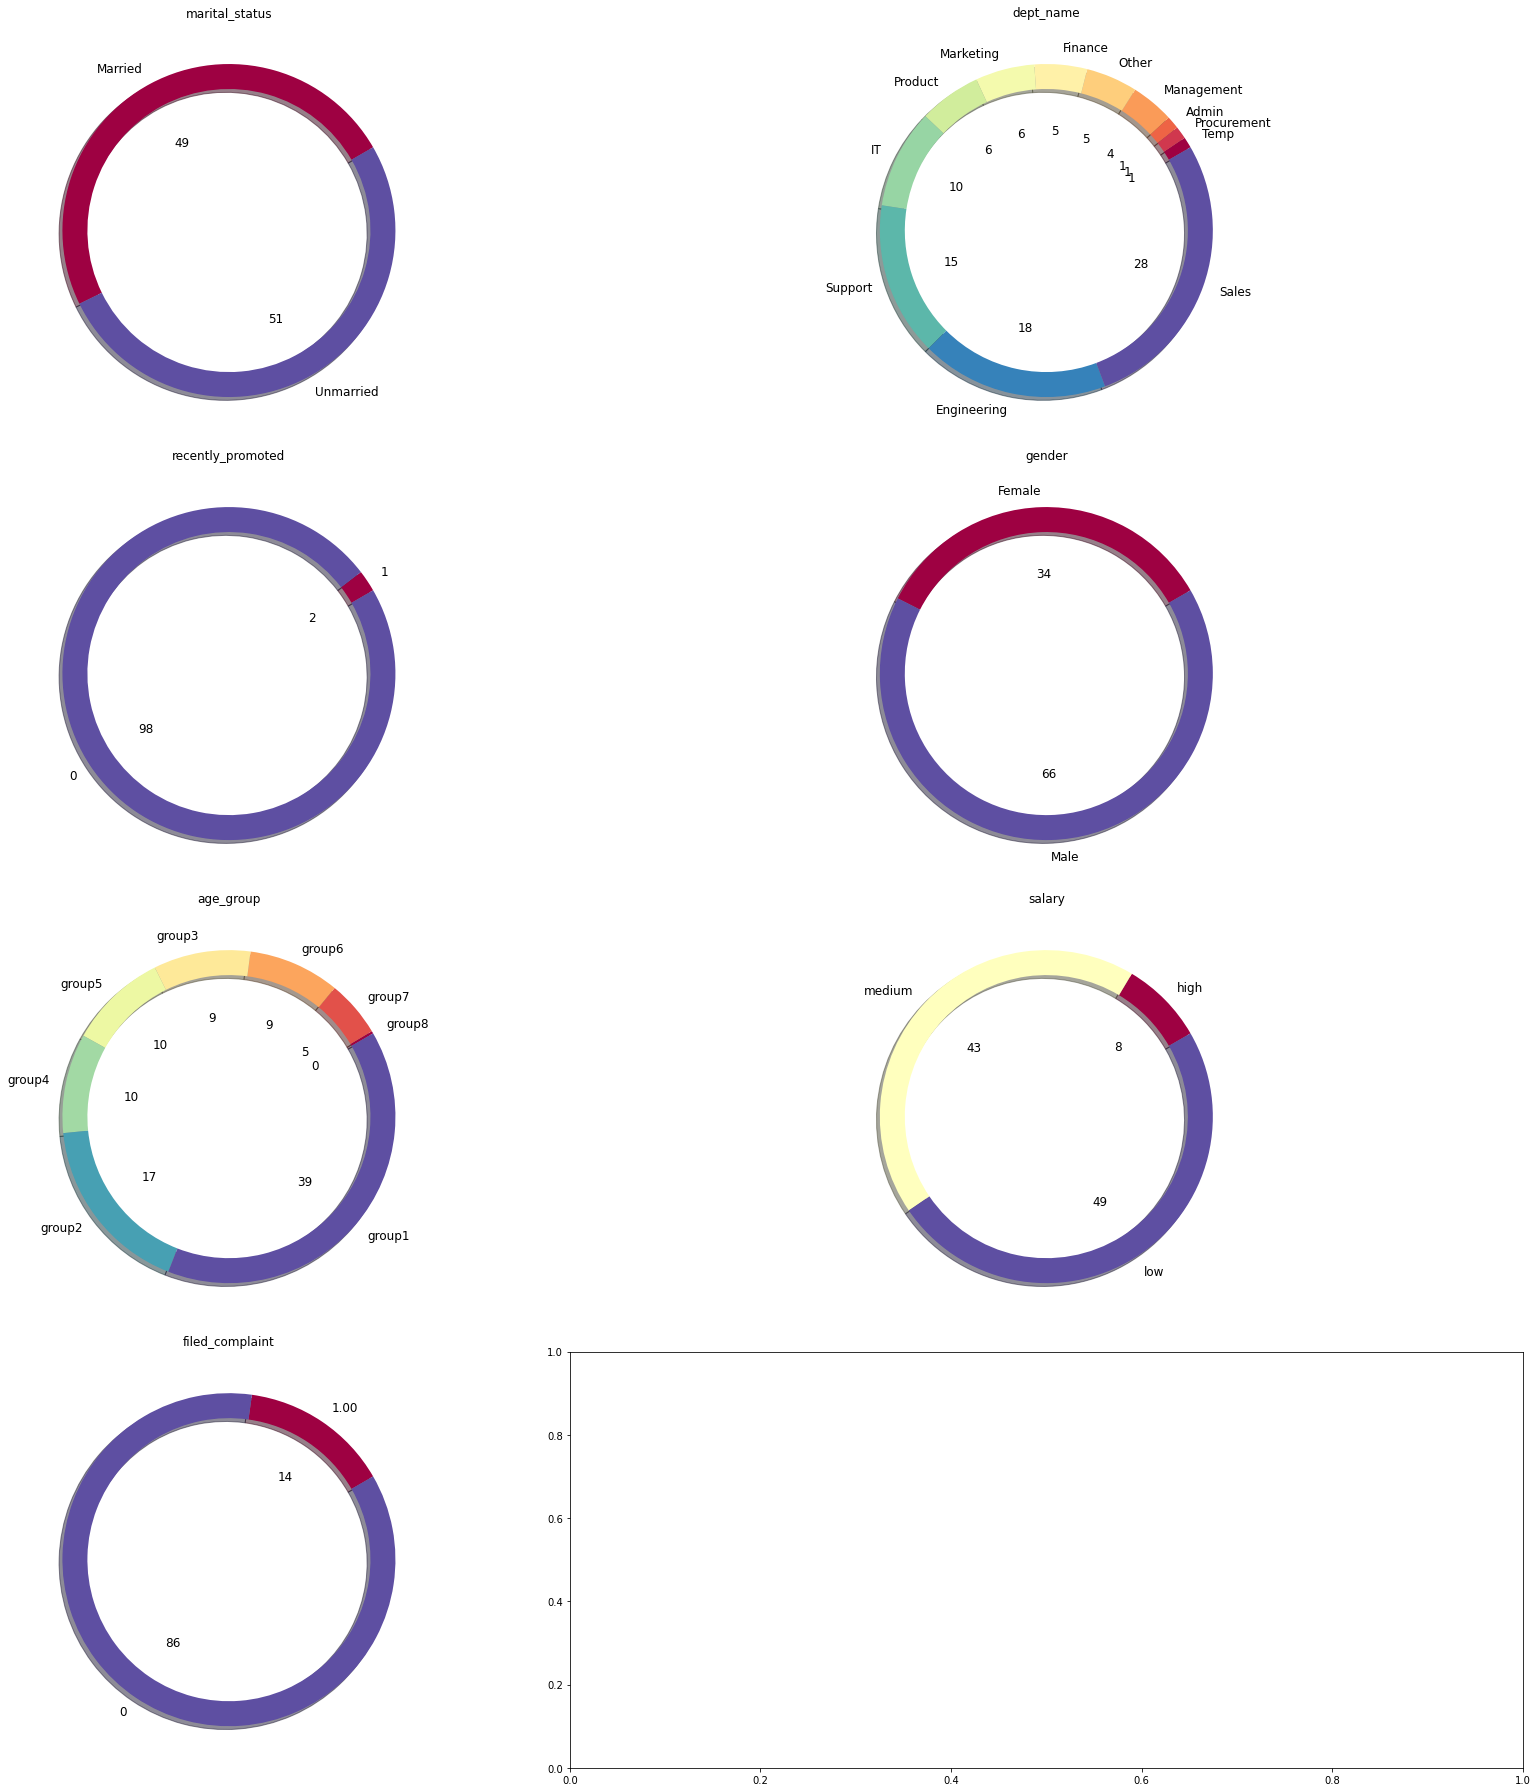

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(25, 25))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train_dataset[cats]):
    _ = train_dataset[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], shadow = True, title=c, autopct='%.0f',cmap = "Spectral", fontsize=12, startangle = 30,wedgeprops=dict(width=0.15))
    _ = axes[i].set_ylabel('')
  
    
_ = plt.tight_layout()

#### **Univariate Analysis - CountPlots**

Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable

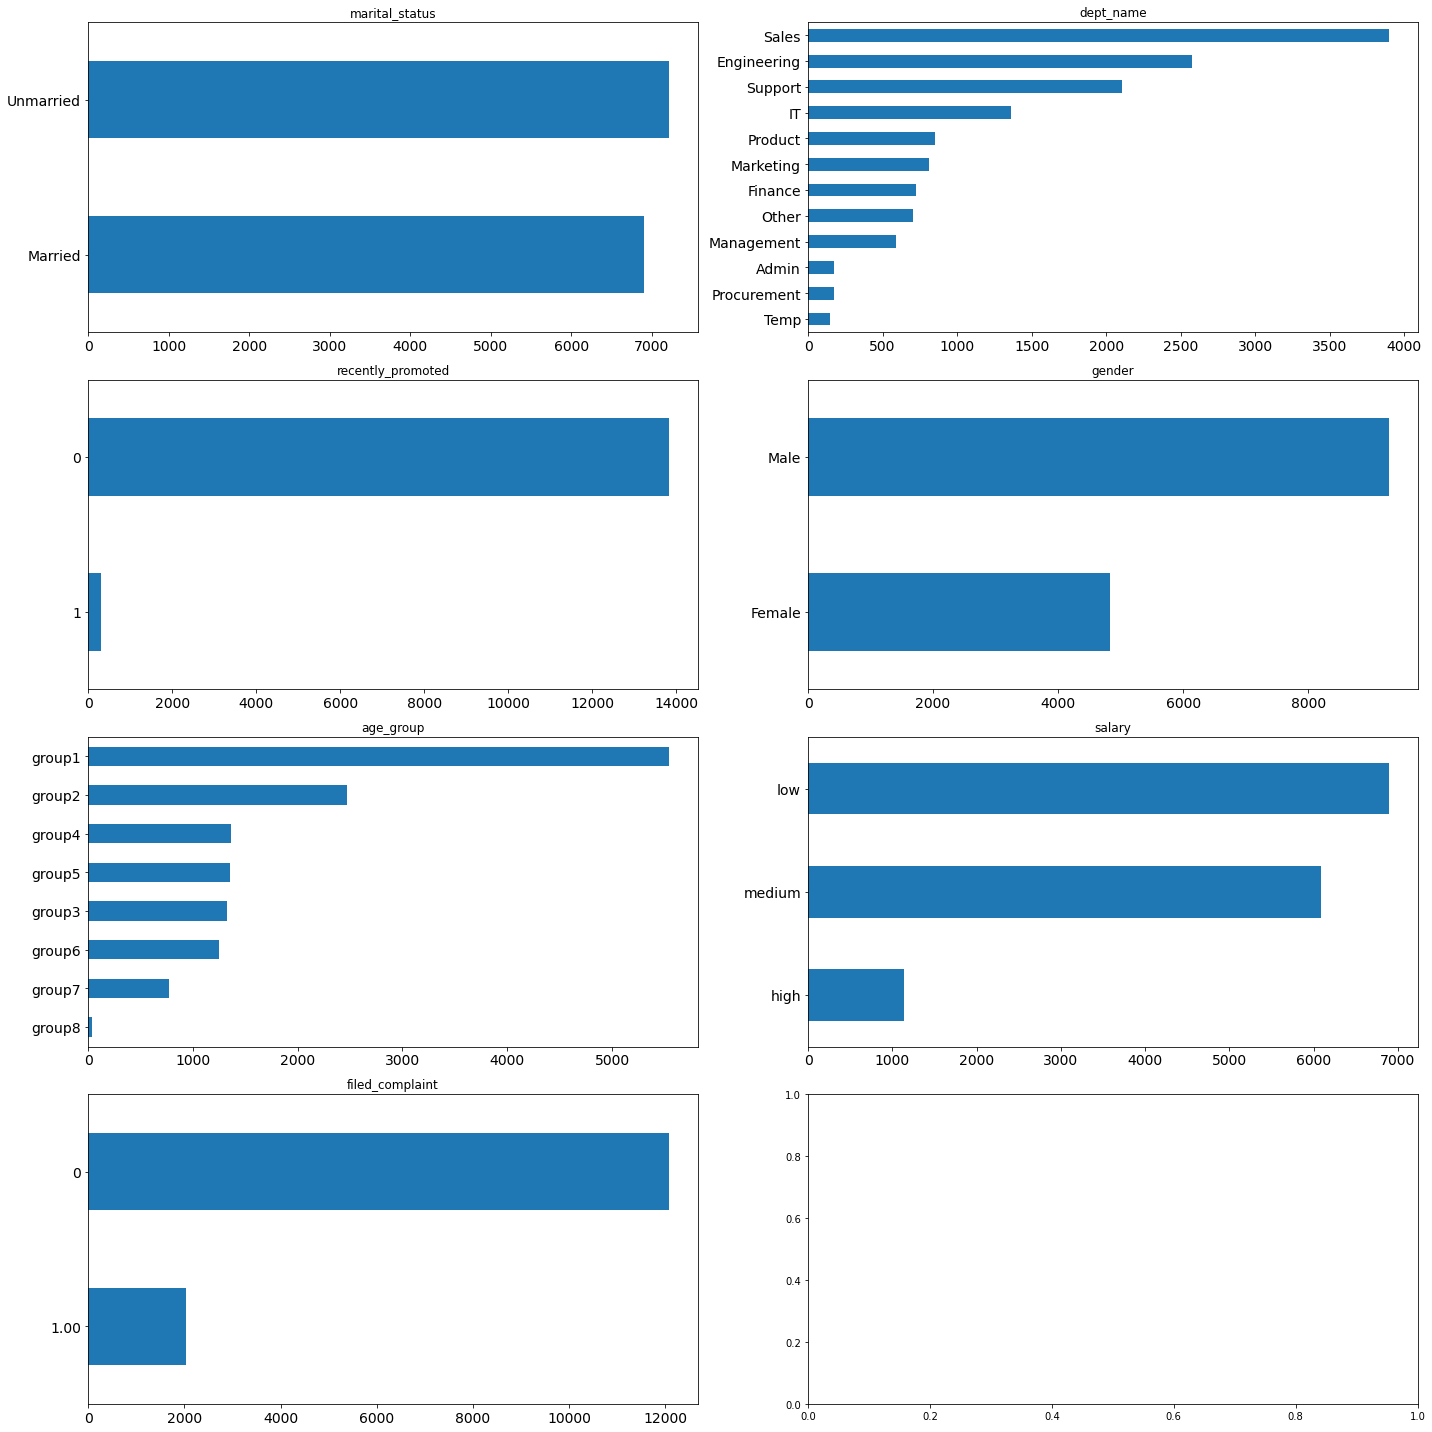

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train_dataset[cats]):
    _ = train_dataset[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

### Insights:
   - Sales department has the maximum employees constituting 28% followed by engineering department having 18% and support having 15% of the total employees.
   - 14% of the employees have filed complaint
   - 49% of the employees are married
   - 2% of the employees are recently promoted
   - 39% of the employees are belo 27 years of age and fall in the age-group 1
   - 49% of the employees are in low salary category, 43% in medium salary category and only 8% are drawing high salary
   - 34% of the employees are female and 66% are male.

<a id=section70102></a>
### 7.1.2 Bivariate Analysis - CountPlots

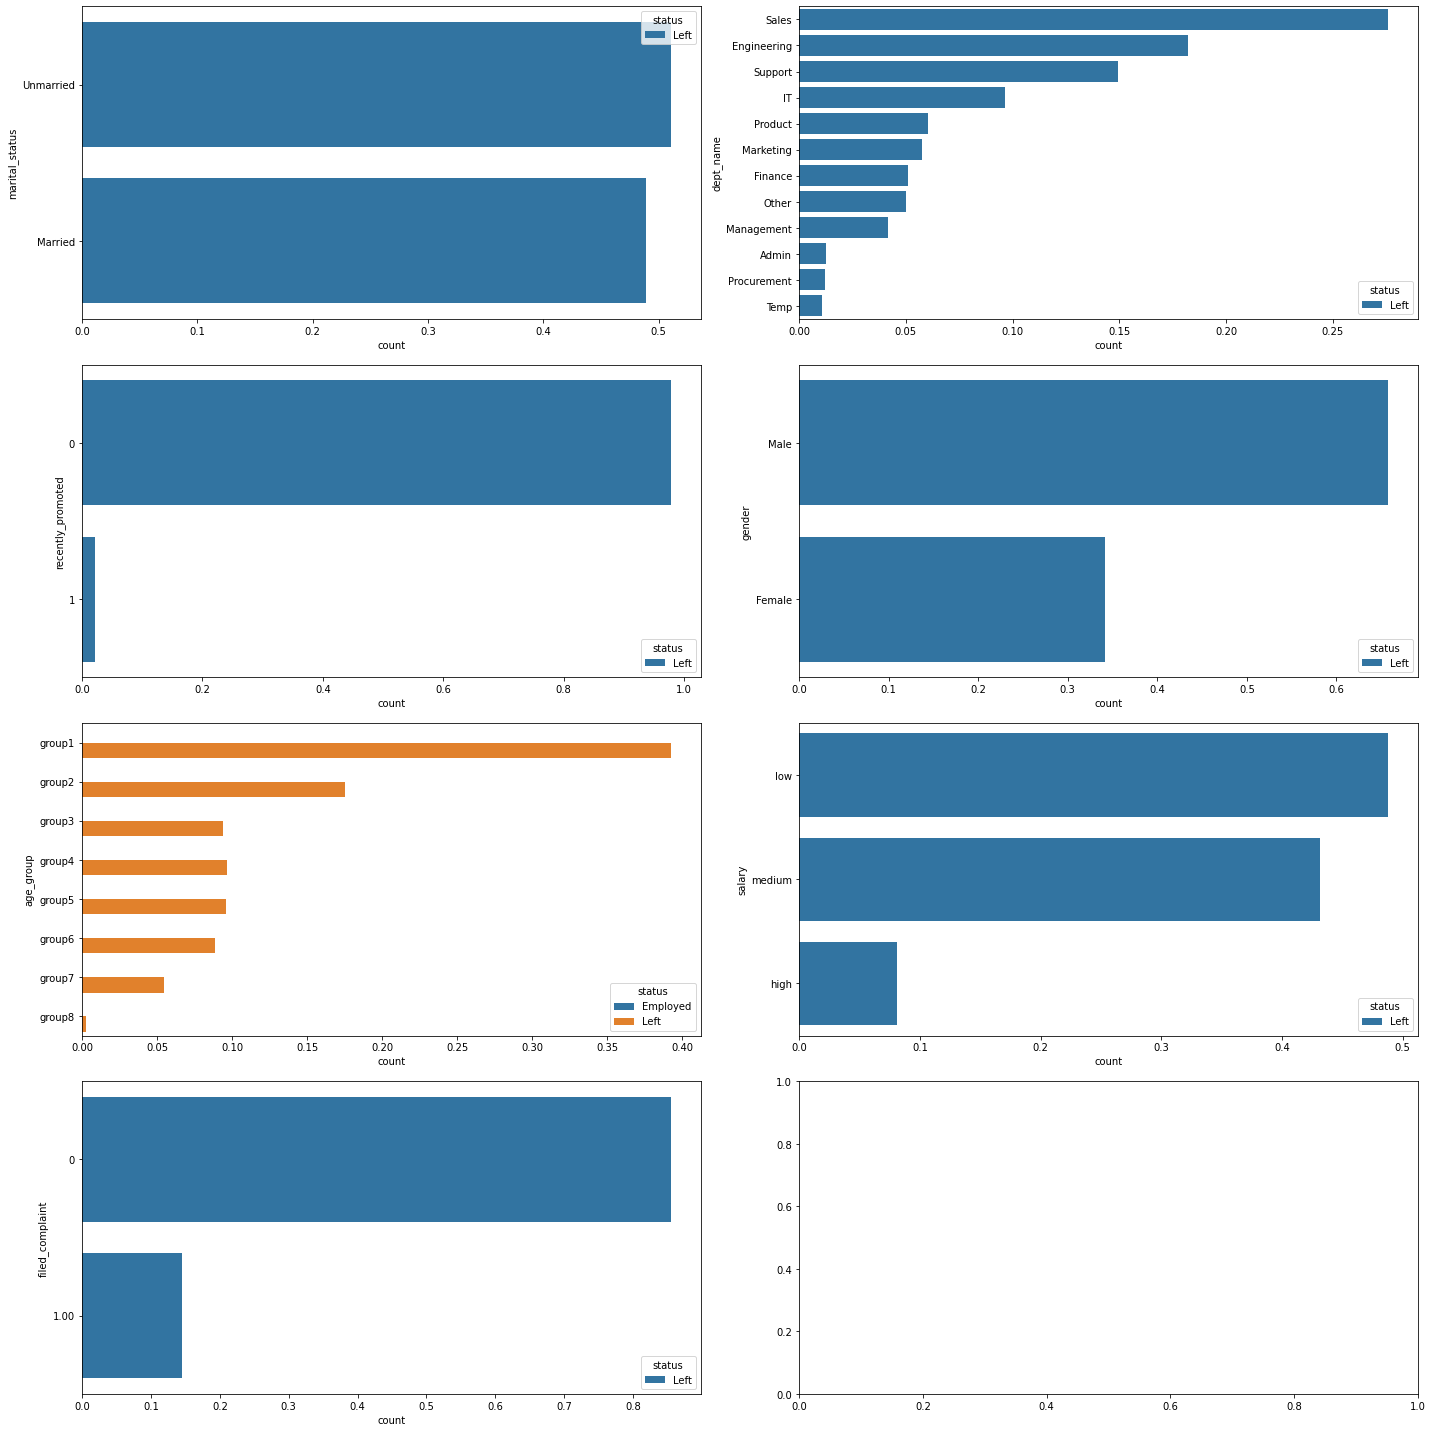

In [ ]:

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train_dataset[cats]):
    fltr = train_dataset[TARGET_COL] == 'Left'
    vc_a = train_dataset[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train_dataset[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 'Employed'
    vc_b[TARGET_COL] = 'Left'

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i], orient='h')
    
_ = plt.tight_layout()

### Insights: What are the most interesting findings?
- More people are leaving in the following departments: Management, Procurement, Admin, Temp and IT.
- Most of the people who have filed complaint have left the company
- Married employees are leaving the company more than the unmarried people
- Once the employees are promoted, they are quitting the company.
- Employees below 26 years and above 45 years are not leaving the company as much as people between 26-46 years.
- Employees with high & medium salaries are the ones leaving the company.

##### Checking for co-relation among the variables:

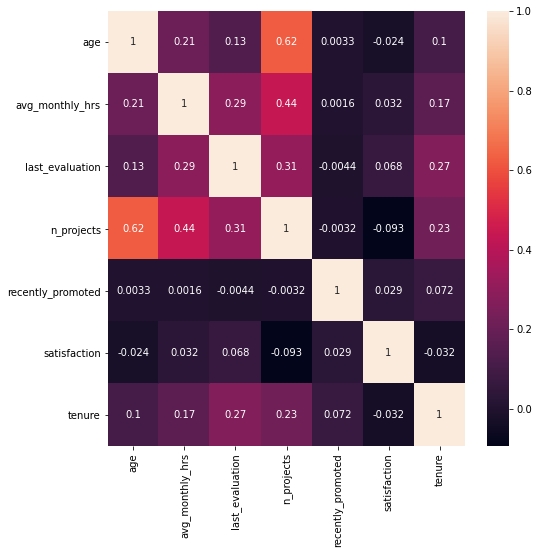

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap( train_dataset[['age', 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation','n_projects','recently_promoted','satisfaction','tenure'] ].corr(), annot=True );

#### Finding - How are married people who are working long hours coping in the company

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


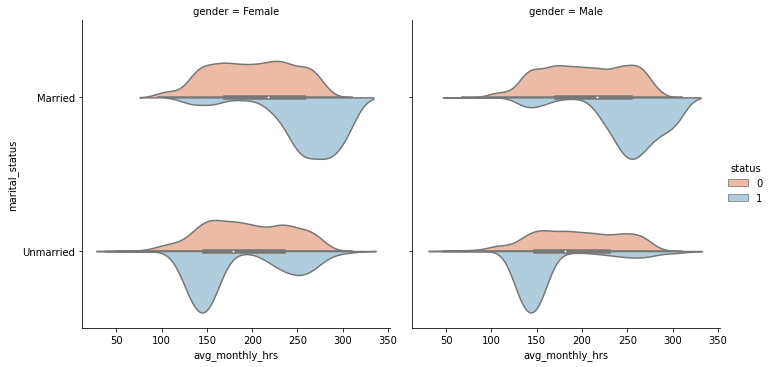

In [ ]:
sns.factorplot(y ='marital_status', x= 'avg_monthly_hrs',kind = 'violin', col = 'gender', 
               hue= 'status',data = train_dataset, palette= 'RdBu', split = True)

**Insights**: Interestingly, most of the married people who have left the company have been working longer hours compared to married people who are still employed. Contrary to married people, Unmarried people who have left the company are interestingly working less than unmarried people who have stayed with the company. 

#### Recently promoted vs average monthly working hours

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


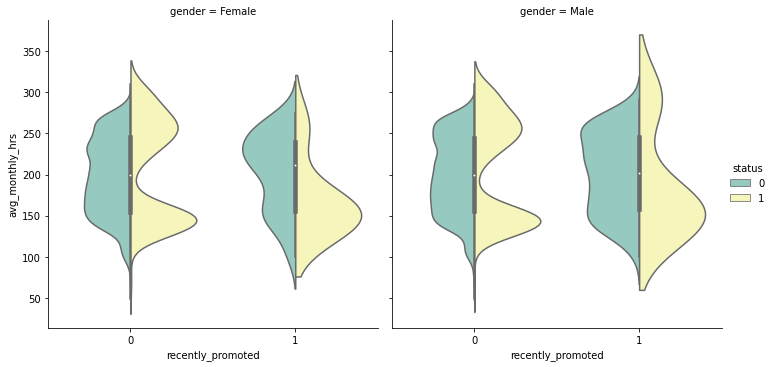

In [ ]:
sns.factorplot(x ='recently_promoted', y= 'avg_monthly_hrs',kind = 'violin', col='gender',
               hue= 'status',data = train_dataset, palette='Set3', split = True)

**Insignts** : When we see how many hours an employees who is promoted working, we notice that a promoted employee if he has intention to leave, reduces his working hours.

#### How are married and unmarried employees doing in the company

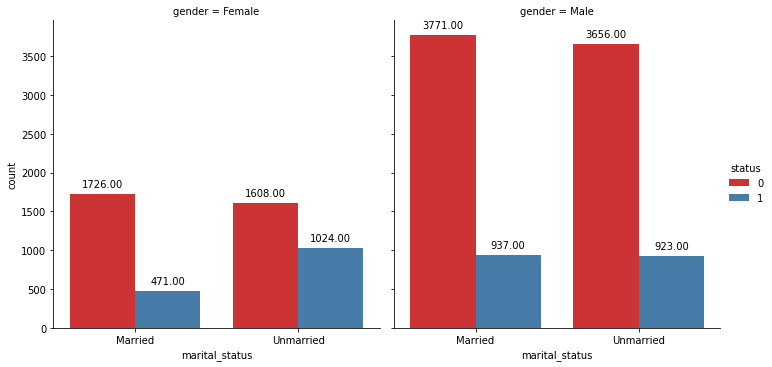

In [ ]:
g = sns.catplot(x ='marital_status', 
               hue= 'status',kind = 'count', col = 'gender', data = train_dataset, palette="Set1")
total = len(train_dataset['marital_status'])
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Insight**: for around 4.5k unmarried/married male(3656+923=4579 unmarried male & 3771+937= 4708 married male ) employees, 900+ employees are quitting. That is around 20% of employees. when we consider Female employees, for 2.1k(1726+471 =2197) married female employees 471 have left which makes 21%. where as 1024 unmarried female employees have left out of (1608+1024=2632) 2632 unmarried female employees, ie., 39% of unmarried female employees have left the company. 

<a id=section8></a>
# 8. Modelling

<a id=section801></a>
# 8.1 Feature Engineering

### Post Processing after EDA

In [ ]:
# for the modelling part we will delete extra two columns of department because if we decode them then three columns have 1 correlation so we can use only 1 of them.
train_dataset.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_name,dept_head,age_group
0,124467,42,Female,Married,246,Other,0,0.866838,6,0,medium,0.134415,1,4,Other,Other,group5
1,112210,23,Female,Unmarried,134,Other,0,0.555718,2,0,low,0.511041,1,3,Other,Other,group1
2,126150,24,Female,Unmarried,156,D00-SS,1.00,0.474082,2,0,medium,0.405101,1,3,Sales,Edward J Bayley,group1
3,125346,51,Female,Married,256,D00-SP,0,0.961360,6,0,low,0.152974,1,4,Support,Amelia Westray,group6
4,113707,23,Female,Unmarried,146,D00-SS,0,0.507349,2,0,medium,0.434845,1,3,Sales,Edward J Bayley,group1


In [ ]:
train_dataset = train_dataset.drop(['dept_name', 'dept_head'], axis=1)

In [ ]:
test_data.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,dept_name,dept_head
0,119045,27,Male,Unmarried,134,D00-IT,0.0,0.528841,2,0,low,0.400464,3,IT,Henry Adey
1,112223,23,Male,Unmarried,221,D00-PD,0.0,0.784561,2,0,low,0.759513,3,Product,Darcy Staines
2,103924,26,Male,Unmarried,156,D00-SS,0.0,0.545183,2,0,medium,0.336457,3,Sales,Edward J Bayley
3,105922,52,Male,Married,133,D00-PR,0.0,0.000000,4,0,medium,0.832039,2,Procurement,Louie Viles
4,103297,27,Male,Unmarried,135,D00-SS,0.0,0.454637,2,0,low,0.320723,5,Sales,Edward J Bayley


In [ ]:
train_dataset.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age_group
0,124467,42,Female,Married,246,Other,0,0.866838,6,0,medium,0.134415,1,4,group5
1,112210,23,Female,Unmarried,134,Other,0,0.555718,2,0,low,0.511041,1,3,group1
2,126150,24,Female,Unmarried,156,D00-SS,1.00,0.474082,2,0,medium,0.405101,1,3,group1
3,125346,51,Female,Married,256,D00-SP,0,0.961360,6,0,low,0.152974,1,4,group6
4,113707,23,Female,Unmarried,146,D00-SS,0,0.507349,2,0,medium,0.434845,1,3,group1


### Lets convert our string categorical to numerical

#### We will encode the variable salary manually since it has an order

In [ ]:
train_dataset['salary'] = train_dataset['salary'].replace({'low':1, 'medium':2, 'high':3})
test_data['salary'] = test_data['salary'].replace({'low':1, 'medium':2, 'high':3})


In [ ]:
string_cate = ['gender', 'marital_status', 'department', 'age_group',]

#### Defining a function to encode columns using 'Label encoding' and 'One Hot Encoding':

In [ ]:
def encode_variable(df, columns, type_='label'):
  data = df.copy()
  if type_=='label':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for i in columns:
      le.fit(data[i])
      data[i] = le.transform(data[i])
  if type_ == 'ohe':
    data = pd.get_dummies(data, columns=columns,drop_first=True)
  return data

<a id=section802></a>
# 8.2 Finding Baseline Model

In [ ]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score,accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
boosting_models = ['xgb', 'lgb']

#### Defining a function to find baseline model

Performs cross validation for the training dataset by using stratified kfold and it returns **F1-score, ROC-AUC, Accuracy** scores. Based on these scores we can select the best model

In [ ]:
def run_model(model, X, y, model_name, test_dataset, n_splits=5):
  skf = StratifiedKFold(n_splits = n_splits)

  oobs = np.zeros(X.shape[0])

  predictions_oob = np.zeros(test_dataset.shape[0])

  for i, (train_id, valid_id) in enumerate(skf.split(X,y)):
    print("FOLD",i)
    X_train, y_train = X[train_id], y[train_id]
    X_valid, y_valid = X[valid_id], y[valid_id]
    if model_name in boosting_models:
      model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=30, verbose=100)
    else:
      model.fit(X_train, y_train)
    
    predictions = model.predict_proba(X_valid)
    oobs[valid_id] = predictions[:,1]

    predictions_oob += model.predict_proba(test_dataset)[:,1]
    

  f1 = f1_score(y, oobs.round())
  roc_auc = roc_auc_score(y, oobs)
  acc = accuracy_score(y, oobs.round())
  print("_________AUC ROC "+str(model_name)+"  SCORE__________")
  print(roc_auc_score(y, oobs))
  print("_________F1 "+str(model_name)+"  SCORE__________")
  print(f1_score(y, oobs.round()))
  print("_________ACCURACY "+str(model_name)+"  SCORE__________")
  print(accuracy_score(y, oobs.round()))

  predictions_oob = predictions_oob/n_splits

  return f1, roc_auc, acc, predictions_oob

In [ ]:
# Features which are not important 
feature_drop_cols = ['employee_id', 'age', 'gender', 'marital_status', 'age_group']

X = train_dataset.drop([TARGET_COL]+feature_drop_cols,axis=1)
y = train_dataset[TARGET_COL]
X_test = test_data.drop(['employee_id'], axis=1)

# Update the list of categorical variables which we have dropped now.

updated_string_cate = list(set(string_cate)-set(feature_drop_cols))


In [ ]:
### Store the Scores for each model
models_df = pd.DataFrame(columns=['Model_name', 'model', 'AUC-ROC', 'F1', 'Accuracy', 'time_train', 'columns'])

## Tried both one hot encoder and label encoder....one hot encoder was performing best 

models = {
    'logistic_regression':['ohe', LogisticRegression(max_iter=1000)],
    'extra_tree_classifier':['ohe', ExtraTreeClassifier()],
    'random_forest':['ohe', RandomForestClassifier(random_state=42)],
    'xgboost': ['ohe', XGBClassifier(n_estimators=1000, tree_method='gpu_hist', gpu_i=0)],
    'LGBM':['ohe', LGBMClassifier(n_estimators=1000, learning_rate=0.05,colsample_bytree=0.8, random_state=42)],
}

In [ ]:
from sklearn.preprocessing import StandardScaler
for i, (model_name, model) in enumerate(models.items()):
  import time
  start = time.time()
  encode_type = model[0]
  model = model[1]
  X_temp = encode_variable(X, columns=updated_string_cate, type_=encode_type)
  X_test_temp = encode_variable(X_test, columns=updated_string_cate, type_=encode_type)

  columns = X_temp.columns.tolist()

  X_temp = X_temp[columns].values
  y_temp = y.values
  X_test_temp = X_test_temp[columns].values 
  
  f1, auc, accuracy,predictions = run_model(model, X_temp, y_temp, model_name,X_test_temp, n_splits=5)
  end = time.time()
  time_taken = end-start
  models_df.loc[i] = model_name, model, auc, f1, accuracy,time_taken, columns

  print("\n\n")

FOLD 0
FOLD 1
FOLD 2
FOLD 3
FOLD 4
_________AUC ROC logistic_regression  SCORE__________
0.8187586237269291
_________F1 logistic_regression  SCORE__________
0.4496619083395943
_________ACCURACY logistic_regression  SCORE__________
0.7924341173136866



FOLD 0
FOLD 1
FOLD 2
FOLD 3
FOLD 4
_________AUC ROC extra_tree_classifier  SCORE__________
0.9255296386146863
_________F1 extra_tree_classifier  SCORE__________
0.8798944126704796
_________ACCURACY extra_tree_classifier  SCORE__________
0.9419807310852932



FOLD 0
FOLD 1
FOLD 2
FOLD 3
FOLD 4
_________AUC ROC random_forest  SCORE__________
0.9880275006436419
_________F1 random_forest  SCORE__________
0.9523809523809523
_________ACCURACY random_forest  SCORE__________
0.9779682629640125



FOLD 0
FOLD 1
FOLD 2
FOLD 3
FOLD 4
_________AUC ROC xgboost  SCORE__________
0.9871649444487608
_________F1 xgboost  SCORE__________
0.9373676248108925
_________ACCURACY xgboost  SCORE__________
0.9706715783508076



FOLD 0
FOLD 1
FOLD 2
FOLD 3
FOLD 4
_

In [ ]:
models_df

,Model_name,model,AUC-ROC,F1,Accuracy,time_train,columns
0,lr,"LogisticRegression(C=1.0, class_weight=None, d...",0.818759,0.449662,0.792434,3.659411,"[avg_monthly_hrs, filed_complaint, last_evalua..."
1,et,"ExtraTreeClassifier(ccp_alpha=0.0, class_weigh...",0.929110,0.884852,0.944319,0.138073,"[avg_monthly_hrs, filed_complaint, last_evalua..."
2,rf,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.988028,0.952381,0.977968,4.873065,"[avg_monthly_hrs, filed_complaint, last_evalua..."
3,xgb,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.980282,0.932540,0.968688,4.043042,"[avg_monthly_hrs, filed_complaint, last_evalua..."
4,lgb,"LGBMClassifier(boosting_type='gbdt', class_wei...",0.990414,0.950855,0.977189,3.427726,"[avg_monthly_hrs, filed_complaint, last_evalua..."


#### Insight 
- As we can see LGBM is giving best AUC-ROC that is the reason we are performing hyper parameter tuning on it

<a id=section803></a>
# 8.3 Hyper parameter tuning

#### Defining a function for hyper parameter tuning

This method finds the best parameters based on AUC-ROC. 

In [ ]:
def hyper_parameter_tuning(X,y,updated_string_cate):
  study = optuna.create_study(direction='maximize')
  encode_type = 'ohe'
  X_temp = encode_variable(X, columns=updated_string_cate, type_=encode_type)
  y_temp = y.values
  X_temp = X_temp.values
  study.optimize(lambda trial: objective(trial, X_temp, y_temp), n_trials=20)
  print(study.best_params)

#### Defining a function to applying the model 

Objective function does the following:
    - Creates random parameters for the model 
    - Applies  random parameters to the model
    - Returns ROC_AUC for the trained dataset

In [ ]:
# import optuna
def objective(trial, X, y, n_splits=5):
  model_name = 'lgb'

  param = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-2, 1e-1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
        'random_state':42,
        'n_estimators':1000,
    }

  model = LGBMClassifier(**param)
  skf = StratifiedKFold(n_splits = n_splits)


  oobs = np.zeros(X.shape[0])

  for i, (train_id, valid_id) in enumerate(skf.split(X,y)):
    print("FOLD",i)
    X_train, y_train = X[train_id], y[train_id]
    X_valid, y_valid = X[valid_id], y[valid_id]
    if model_name in boosting_models:
      model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=30, verbose=1000)
    else:
      model.fit(X_train, y_train)
    
    predictions = model.predict_proba(X_valid)
    oobs[valid_id] = predictions[:,1]

  roc_auc = roc_auc_score(y, oobs)

  return roc_auc

<a id=section9></a>
# 9. Submission for unseen Data

- Parameters Found using hyper parameter for the model, Predicting the probabilities for the test dataset

In [ ]:
import time
start = time.time()

encode_type = 'ohe'

params = {'num_leaves': 77, 'learning_rate': 0.015893279011659402, 'colsample_bytree': 0.8900306223727544, 'random_state':42, 'n_estimators':1000}

model = LGBMClassifier(**params)

X_temp = encode_variable(X, columns=updated_string_cate, type_=encode_type)
X_test_temp = encode_variable(X_test, columns=updated_string_cate, type_=encode_type)
# columns = X_temp.columns.tolist()

print(len(X_temp.columns))
chi2_features = SelectKBest(chi2, k = 18) 
X_kbest_features = chi2_features.fit_transform(X_temp, y.values) 

columns = X_temp.loc[:,chi2_features.get_support()].columns

X_test_temp = X_test_temp[columns]

X_temp = X_temp[columns].values
y_temp = y.values
X_test_temp = X_test_temp.values

f1, auc, accuracy,predictions = run_model(model, X_temp, y_temp, 'LGB',X_test_temp)
end = time.time()
time_taken = end-start

19
FOLD 0
FOLD 1
FOLD 2
FOLD 3
FOLD 4
_________AUC ROC LGB  SCORE__________
0.9898425636208249
_________F1 LGB  SCORE__________
0.9545523635810913
_________ACCURACY LGB  SCORE__________
0.9788183621422499


<a id=section901></a>
# 9.1 Creating the Submission file

In [ ]:
test_data['status'] = predictions

In [ ]:
test_data.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,dept_name,dept_head,status
0,119045,27,Male,Unmarried,134,D00-IT,0.0,0.528841,2,0,1,0.400464,3,IT,Henry Adey,0.996263
1,112223,23,Male,Unmarried,221,D00-PD,0.0,0.784561,2,0,1,0.759513,3,Product,Darcy Staines,0.019890
2,103924,26,Male,Unmarried,156,D00-SS,0.0,0.545183,2,0,2,0.336457,3,Sales,Edward J Bayley,0.975907
3,105922,52,Male,Married,133,D00-PR,0.0,0.000000,4,0,2,0.832039,2,Procurement,Louie Viles,0.000924
4,103297,27,Male,Unmarried,135,D00-SS,0.0,0.454637,2,0,1,0.320723,5,Sales,Edward J Bayley,0.575503


In [ ]:
test_data[['employee_id', 'status']].to_csv('submission.csv', index=False)

In [ ]:
test_data[['employee_id', 'status']].head()

,employee_id,status
0,119045,0.996263
1,112223,0.019890
2,103924,0.975907
3,105922,0.000924
4,103297,0.575503


 ### Final Submission score-0.98 accuracy , 0.97 f1 score

<a id=section10></a>
# 10. Conclusions
- Missing data has been handled.
- Multiple models have been tested and best results are considered. (Logistic Regression, ExtraTreeClassifier, Random_Forest, XGBoost, LGBM)
- **LIGHTGBM was the giving the best CV for the training data. F1-SCORE: 95 , AUC-ROC: 99%, ACCURACY:97.8%**
- Used Stratified KFold for cross validation (it will avoid overfitting)
- Used optuna for Hyperparameter tuning.